In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_loan=pd.read_csv('train.csv')

In [3]:
df_loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df_loan = df_loan.drop(['Loan_ID'],axis =1)

In [8]:
married_check = df_loan[df_loan.Married.isna()]
married_check.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [9]:
df_loan['CoapplicantIncome_not_null'] = df_loan.apply(lambda x : '+' if x['CoapplicantIncome']>0 else '-',axis = 1)

<AxesSubplot:xlabel='Married', ylabel='count'>

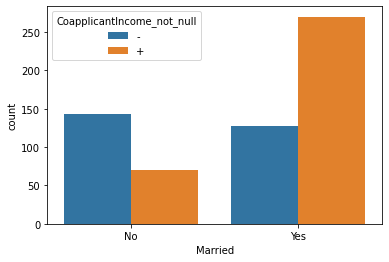

In [10]:
#married vs CoapplicantIncome_not_null dependency
import seaborn as sns
sns.countplot(x='Married',hue='CoapplicantIncome_not_null',data= df_loan)

In [11]:
df_loan['Married'] = df_loan.Married.fillna(df_loan.apply(lambda x: 'Yes' if x['CoapplicantIncome'] > 0 else 'No', axis=1))

In [12]:
df_loan.Dependents = df_loan.Dependents.fillna('0')
df_loan.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
df_gender = df_loan.groupby('Gender').mean()
df_gender

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,
Female,4643.473214,1108.008929,126.697248,352.293578,0.831683
Male,5446.460123,1742.932352,149.265957,339.665272,0.847007


In [14]:
df_gender.ApplicantIncome[0]

4643.473214285715

In [15]:
gender_applicant_income_limit = df_gender.ApplicantIncome.mean()
gender_applicant_income_limit

5044.9666684925505

In [16]:
df_loan['Gender'] = df_loan.Gender.fillna(df_loan.apply(lambda x: 'Female' if x['ApplicantIncome'] < gender_applicant_income_limit else 'Male', axis=1))

In [17]:
df_loan['Self_Employed'] = df_loan.Self_Employed.fillna(df_loan.apply(lambda x: 'Yes' if x['CoapplicantIncome'] == 0 else 'No', axis=1))

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

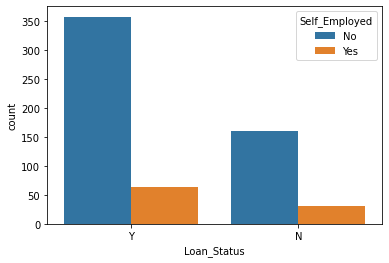

In [18]:
sns.countplot(x='Loan_Status',hue='Self_Employed',data = df_loan)

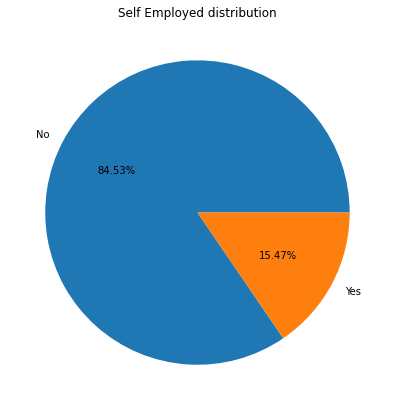

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.pie(x = df_loan.Self_Employed.value_counts(),labels = df_loan.Self_Employed.unique(),autopct='%1.2f%%')
plt.title('Self Employed distribution')
plt.show()

In [20]:
df_loan_test = df_loan[~df_loan.LoanAmount.isna()]
df_loan_test.shape

(592, 13)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

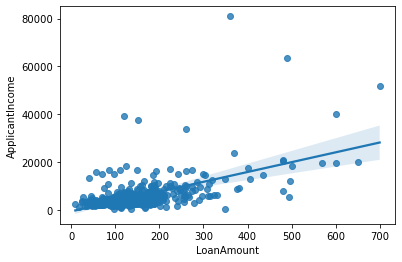

In [21]:
sns.regplot(x='LoanAmount',y='ApplicantIncome',data=df_loan)

In [22]:
from scipy.stats import linregress

In [23]:
slope = linregress(df_loan_test.LoanAmount, df_loan_test.ApplicantIncome).slope
df_loan.LoanAmount = df_loan.LoanAmount.fillna(df_loan.apply(lambda x: x['ApplicantIncome'] / slope, axis=1))

In [24]:
#df_numeric = df_loan.loc[(df_loan['LoanAmount'].str.isnumeric()) & (df_loan['ApplicantIncome'].str.isnumeric())]

In [25]:
loan_term_counts = df_loan.Loan_Amount_Term.value_counts()
loan_term_labels = df_loan.Loan_Amount_Term.value_counts().index.tolist()
len(loan_term_counts), len(loan_term_labels)

(10, 10)

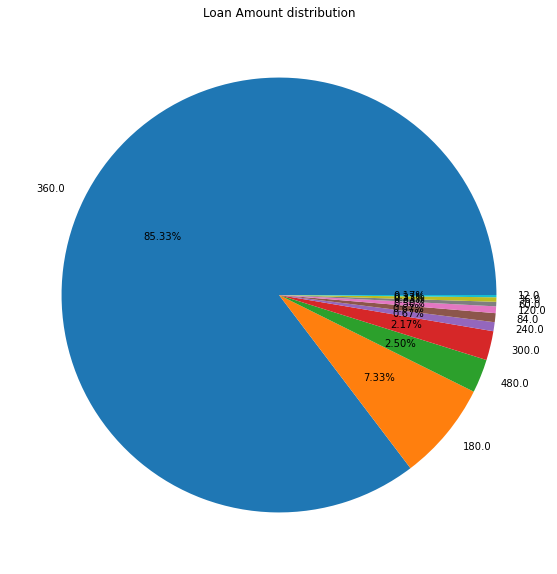

In [26]:
plt.figure(figsize=(10,10))
plt.pie(x = loan_term_counts,labels = loan_term_labels,autopct='%1.2f%%')
plt.title('Loan Amount distribution')
plt.show()

In [27]:
df_loan.Loan_Amount_Term = df_loan.Loan_Amount_Term.fillna(360.0 )

In [28]:
df_loan.Credit_History = df_loan.Credit_History.astype(str)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

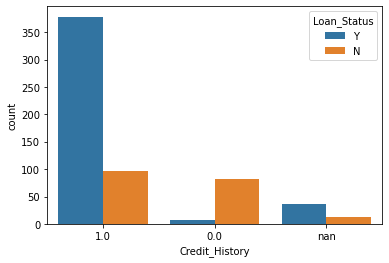

In [29]:
sns.countplot(x='Credit_History',hue='Loan_Status',data = df_loan)

In [30]:
df_loan[df_loan.Credit_History=='nan'].shape

(50, 13)

In [31]:
df_loan.Loan_Status = df_loan.Loan_Status.astype(str)

In [32]:
df_loan = df_loan.replace({'Credit_History':{'nan':df_loan.apply(lambda x : '1.0' if x['Loan_Status']=='Y' else '0.0',axis=1)}})

In [ ]:
#from sklearn.preprocessing import LabelEncoder

In [ ]:
#label_encoder = LabelEncoder()

In [ ]:
#df_loan.replace('-', np.nan, inplace=True)

In [33]:
df_loan = df_loan.drop(['CoapplicantIncome_not_null'],axis=1)

In [34]:
df_loan.replace({'Gender': {'Female': 0, 'Male': 1},
                 'Married': {'Yes': 1, 'No': 0},
                 'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
                 'Education': {'Graduate': 0, 'Not Graduate': 1},
                 'Self_Employed': {'No': 0, 'Yes': 1},
                 'Credit_History': {'1.0': 1, '0.0': 0},
                 'Property_Area': {'Semiurban': 0, 'Urban': 1, 'Rural': 2},
                 'Loan_Status': {'Y': 1, 'N': 0}}, inplace=True)

In [ ]:
#df_loan.fillna(df_loan.mean(), inplace=True)

In [ ]:
#df_loan = df_loan.apply(pd.to_numeric, errors='coerce').dropna()

In [35]:
X = df_loan.drop(['Loan_Status'], axis=1)
y = df_loan.Loan_Status

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [38]:
# Initialize and train the classification in 4 different models
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
model3 = SVC()
model3.fit(X_train, y_train)

SVC()

In [41]:
model4 = DecisionTreeClassifier()
model4.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)
accuracy4 = accuracy_score(y_test, y_pred4)

In [44]:
print("Model1 Accuracy:", accuracy1)
print("Model2 Accuracy:", accuracy2)
print("Model3 Accuracy:", accuracy3)
print("Model4 Accuracy:", accuracy4)

Model1 Accuracy: 0.8292682926829268
Model2 Accuracy: 0.6504065040650406
Model3 Accuracy: 0.6910569105691057
Model4 Accuracy: 0.7560975609756098


In [ ]:
#save data

In [45]:
import pickle
# Save the model to a file
with open('trained_model1.pkl', 'wb') as file:
    pickle.dump(model1, file)
with open('trained_model2.pkl', 'wb') as file:
    pickle.dump(model2, file)
with open('trained_model3.pkl', 'wb') as file:
    pickle.dump(model3, file)
with open('trained_model4.pkl', 'wb') as file:
    pickle.dump(model4, file)